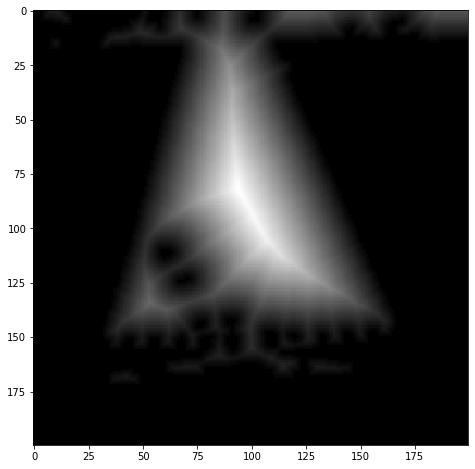

In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

originalImage = cv2.imread('../Images/Cropped_Runway/00001.png')
figure = plt.figure(figsize = (15,8))
originalImage = cv2.cvtColor(originalImage,cv2.COLOR_BGR2RGB)
grayImage = cv2.cvtColor(originalImage,cv2.COLOR_BGR2GRAY)


ret, thresholdImage = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresholdImage, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations = 1)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


a_dict = {131:originalImage, 132:grayImage, 133:thresholdImage}
plt.imshow(dist_transform, cmap = 'gray')

# for key, value in a_dict.items():
#     plt.subplot(key)
#     plt.axis('off')
#     plt.imshow(value, cmap = 'gray')

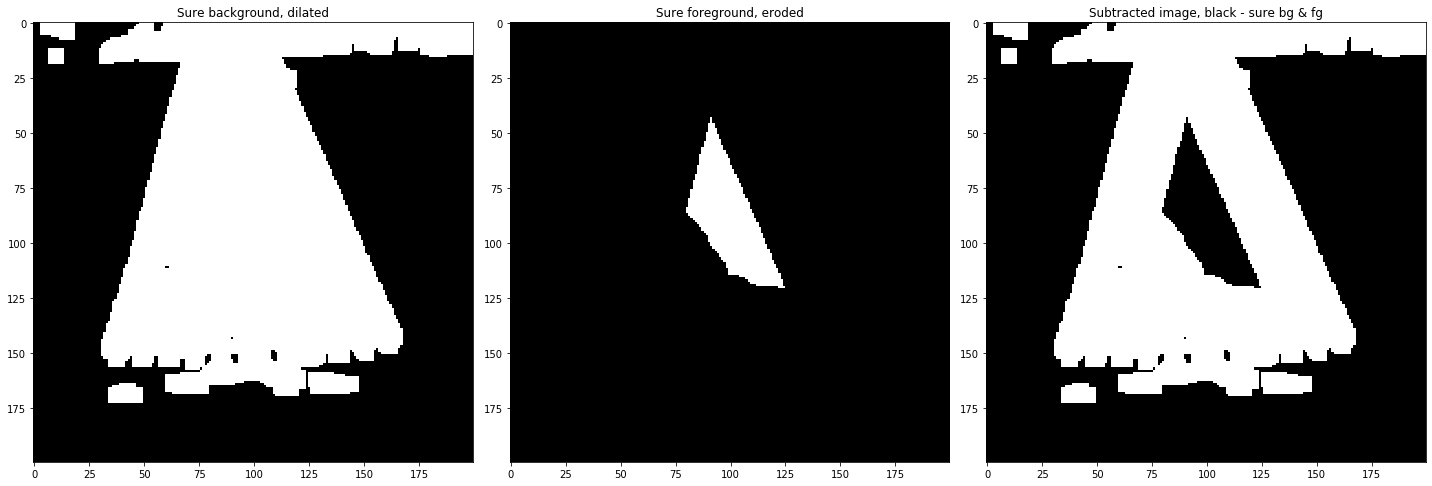

In [54]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

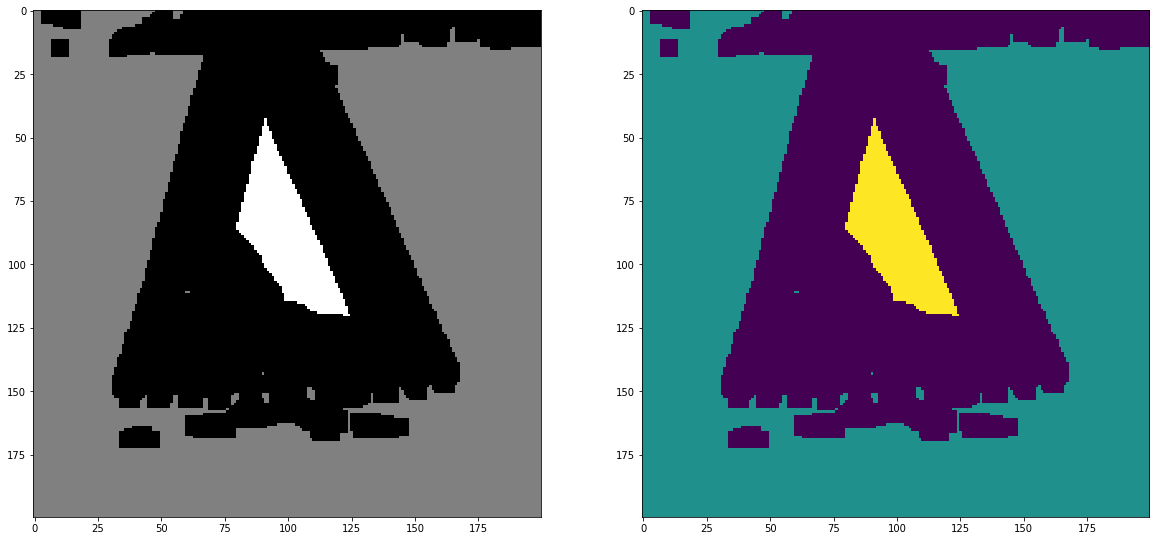

In [55]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

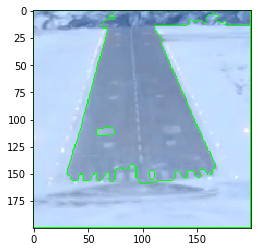

In [56]:
markers = cv2.watershed(originalImage, markers)
originalImage[markers == -1] = [0, 255,0]
plt.imshow(originalImage)